In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_files import read_fchk, read_npz

# Atomic number to element symbol mapping
atomic_number_to_symbol = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    # Add more if needed
}



def analyze_folder(folder_path):
    records = []
    all_elements = []

    for file in glob.glob(os.path.join(folder_path, "*.npz")):
        _, atomic_numbers = read_npz(file)
        num_atoms = len(atomic_numbers)
        elements = [atomic_number_to_symbol.get(n, f"Z{n}") for n in atomic_numbers]
        all_elements.extend(elements)

        records.append({
            "filename": os.path.basename(file),
            "num_atoms": num_atoms,
            "elements": elements
        })

    df = pd.DataFrame(records)

    # Molecule size histogram
    size_hist = df['num_atoms'].value_counts().sort_index()

    # Element histogram
    element_series = pd.Series(all_elements)
    element_hist = element_series.value_counts().sort_index()

    # Plot molecule size histogram
    plt.figure(figsize=(10, 5))
    #size_hist.plot(kind='bar', color='teal')
    plt.hist(df['num_atoms'], bins=range(1, df['num_atoms'].max() + 2), color='blue')
    plt.xlabel('Number of Atoms in Molecule')
    plt.ylabel('Number of Molecules')
    plt.title('Molecule Sizes ')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot element histogram
    plt.figure(figsize=(10, 5))
    element_hist.plot(kind='bar', color='blue')
    plt.xlabel('Element')
    plt.ylabel('Total Atom Count')
    plt.title('Elements Across All Molecules')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df, size_hist, element_hist

# Example usage
#folder_path = "/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters" # Replace with actual folder
folder_path =  "/scratch/phys/sin/sethih1/data_files/old/all_group_images"
df_molecules, size_hist, element_hist = analyze_folder(folder_path)

# Save (optional)
#df_molecules.to_csv("molecule_data.csv", index=False)
#size_hist.to_csv("molecule_size_histogram.csv")
#element_hist.to_csv("element_histogram.csv")

# Print summary
print("Top elements:\n", element_hist.head())
print("Total number of molecules:", len(df_molecules))


KeyboardInterrupt: 

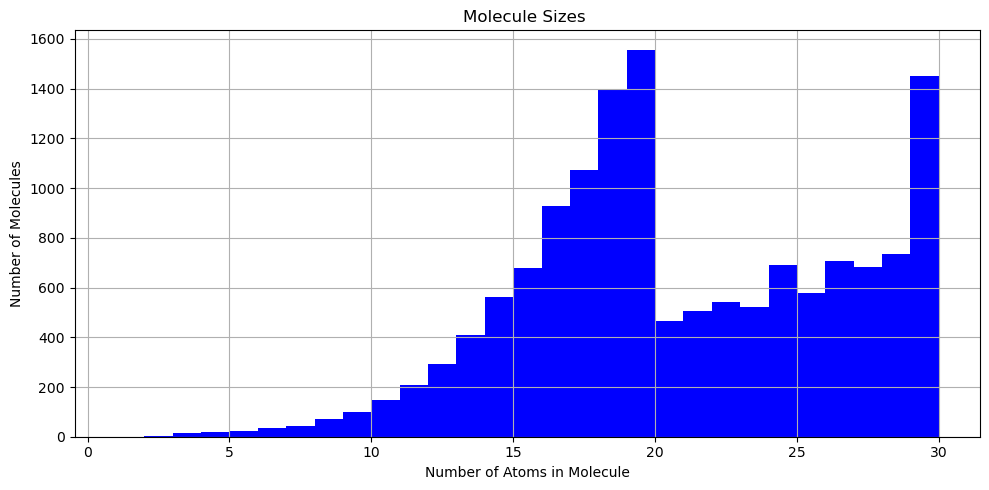

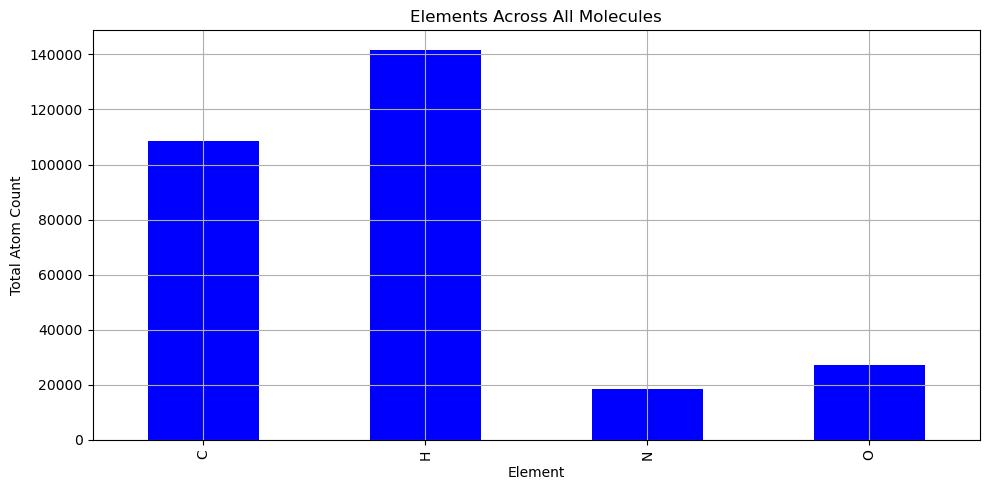

Top elements:
 C    108425
H    141667
N     18607
O     27123
Name: count, dtype: int64
Total number of molecules: 14463


In [3]:
def analyze_folder(folder_path):
    records = []
    all_elements = []

    for file in glob.glob(os.path.join(folder_path, "*.fchk")):
        _, atomic_numbers = read_fchk(file)
        num_atoms = len(atomic_numbers)
        elements = [atomic_number_to_symbol.get(n, f"Z{n}") for n in atomic_numbers]
        all_elements.extend(elements)

        records.append({
            "filename": os.path.basename(file),
            "num_atoms": num_atoms,
            "elements": elements
        })

    df = pd.DataFrame(records)

    # Molecule size histogram
    size_hist = df['num_atoms'].value_counts().sort_index()

    # Element histogram
    element_series = pd.Series(all_elements)
    element_hist = element_series.value_counts().sort_index()

    # Plot molecule size histogram
    plt.figure(figsize=(10, 5))
    #size_hist.plot(kind='bar', color='teal')
    plt.hist(df['num_atoms'], bins=range(1, df['num_atoms'].max() + 1), color='blue')
    plt.xlabel('Number of Atoms in Molecule')
    plt.ylabel('Number of Molecules')
    plt.title('Molecule Sizes ')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot element histogram
    plt.figure(figsize=(10, 5))
    element_hist.plot(kind='bar', color='blue')
    plt.xlabel('Element')
    plt.ylabel('Total Atom Count')
    plt.title('Elements Across All Molecules')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df, size_hist, element_hist

# Example usage
#folder_path = "/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters" # Replace with actual folder
folder_path =  "/scratch/phys/sin/sethih1/data_files/first_second_third_group"
df_molecules, size_hist, element_hist = analyze_folder(folder_path)


# Print summary
print("Top elements:\n", element_hist.head())
print("Total number of molecules:", len(df_molecules))

In [ ]:
1455

In [19]:
1164 + 291

1455

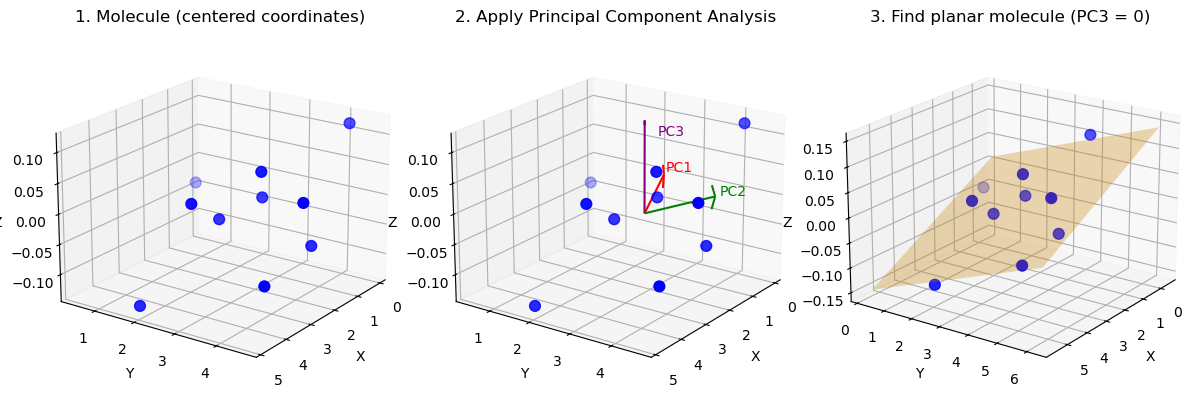

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate slightly planar molecule
np.random.seed(0)
N = 10
xy_coords = np.random.rand(N, 2) * 5
z_coords = np.random.randn(N) * 0.05
coords = np.hstack([xy_coords, z_coords[:, None]])

# Center and PCA
coords_centered = coords - coords.mean(axis=0)
cov_matrix = np.cov(coords_centered.T)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
order = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, order]

# Plane fitting via SVD
U, S, Vt = np.linalg.svd(coords_centered)
normal_vector = Vt[2]
point = coords.mean(axis=0)

# Plane grid
plane_size = 6
xx, yy = np.meshgrid(np.linspace(point[0] - plane_size/2, point[0] + plane_size/2, 10),
                     np.linspace(point[1] - plane_size/2, point[1] + plane_size/2, 10))
zz = (-normal_vector[0]*(xx - point[0]) - normal_vector[1]*(yy - point[1])) / normal_vector[2] + point[2]

# Plot
fig = plt.figure(figsize=(12, 4))

# Panel 1: Atomic Coordinates
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax1.set_title("1. Molecule (centered coordinates)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=20, azim=35)

# Panel 2: PCA
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)

arrow_length_ratio = 0.05  # Smaller arrowhead

for vec, color, label in zip(eigenvectors.T, ['red', 'green', 'purple'], ['PC1', 'PC2', 'PC3']):
    # Label offset to avoid overlap, tweak as needed
    label_pos = point + vec * 1.6
    length = 1.5
    if label == 'PC3':
        label_pos = point + vec * 0.15
        label_pos += np.array([0, 0.3, -0.02])  # Slight upward shift for PC3 label
        length = 0.15
    ax2.quiver(*point, *vec, length=length, color=color, arrow_length_ratio=arrow_length_ratio)
    ax2.text(*label_pos, label, color=color, fontsize=10)
ax2.set_title("2. Apply Principal Component Analysis")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=20, azim=35)

# Panel 3: Best-Fit Plane
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax3.plot_surface(xx, yy, zz, alpha=0.3, color='orange')
ax3.set_title("3. Find planar molecule (PC3 = 0)")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.view_init(elev=20, azim=35)

# Save and show
fig.tight_layout()
plt.savefig("pca_rmsd_planarity_presentation.svg", format='svg', dpi=300)
plt.show()


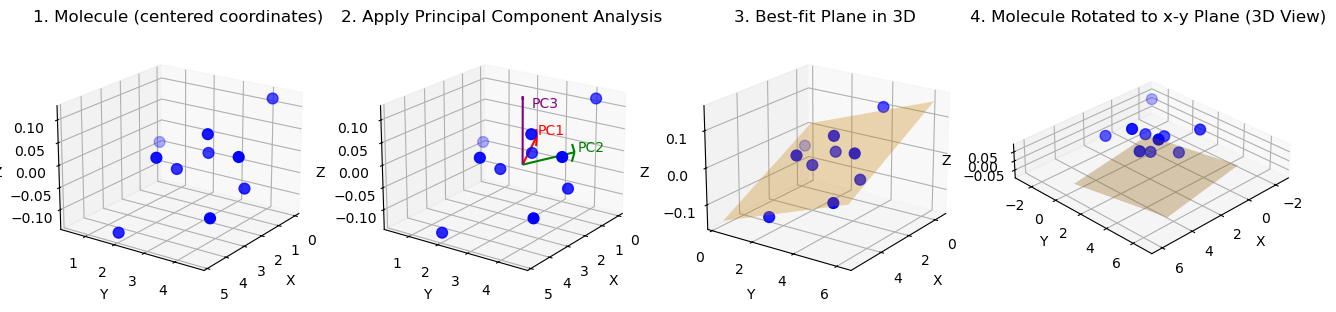

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (Your existing code here...)

def rotation_matrix_from_vectors(vec1, vec2):
    """ Find rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: Rotation matrix (3x3) which when applied to vec1 aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)  # no rotation needed
    kmat = np.array([[ 0, -v[2], v[1]],
                     [ v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])
    rotation_mat = np.eye(3) + kmat + kmat @ kmat * ((1 - c) / (s ** 2))
    return rotation_mat

# Compute rotation matrix to align normal_vector with z-axis
R = rotation_matrix_from_vectors(normal_vector, np.array([0, 0, 1]))

# Rotate coordinates and plane points
coords_rot = (R @ coords_centered.T).T
point_rot = R @ (point - point)  # point centered, so zero vector here

# Rotate plane grid points to get zz=0 (should be close to zero)
plane_points = np.vstack([xx.ravel() - point[0], yy.ravel() - point[1], zz.ravel() - point[2]])
rotated_plane_points = R @ plane_points
xx_rot = rotated_plane_points[0].reshape(xx.shape) + point[0]
yy_rot = rotated_plane_points[1].reshape(yy.shape) + point[1]
zz_rot = rotated_plane_points[2].reshape(zz.shape) + point[2]

# Plotting updated figure with rotated plane
fig = plt.figure(figsize=(16, 4))

# Panel 1: Original molecule
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax1.set_title("1. Molecule (centered coordinates)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=20, azim=35)

# Panel 2: PCA arrows
ax2 = fig.add_subplot(142, projection='3d')
ax2.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
arrow_length_ratio = 0.05
for vec, color, label in zip(eigenvectors.T, ['red', 'green', 'purple'], ['PC1', 'PC2', 'PC3']):
    label_pos = point + vec * 1.6
    length = 1.5
    if label == 'PC3':
        label_pos = point + vec * 0.15
        label_pos += np.array([0, 0.3, -0.02])
        length = 0.15
    ax2.quiver(*point, *vec, length=length, color=color, arrow_length_ratio=arrow_length_ratio)
    ax2.text(*label_pos, label, color=color, fontsize=10)
ax2.set_title("2. Apply Principal Component Analysis")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=20, azim=35)

# Panel 3: Best-fit plane original orientation
ax3 = fig.add_subplot(143, projection='3d')
ax3.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='blue', s=60)
ax3.plot_surface(xx, yy, zz, alpha=0.3, color='orange')
ax3.set_title("3. Best-fit Plane in 3D")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.view_init(elev=20, azim=35)

# Panel 4: Rotated molecule and plane aligned to x-y plane with 3D perspective
ax4 = fig.add_subplot(144, projection='3d')
ax4.scatter(coords_rot[:, 0], coords_rot[:, 1], coords_rot[:, 2], color='blue', s=60)
ax4.plot_surface(xx_rot, yy_rot, zz_rot, alpha=0.3, color='orange')
ax4.set_title("4. Molecule Rotated to x-y Plane (3D View)")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_zlabel("Z")

# Set view angle to highlight rotation but still see depth
ax4.view_init(elev=30, azim=45)  # try different angles if you want
ax4.set_box_aspect([1,1,0.2])  # flatten z aspect ratio slightly to emphasize planarity

# Optionally set axis limits close to data for better scale perception
lims = 3  # adjust based on your data range




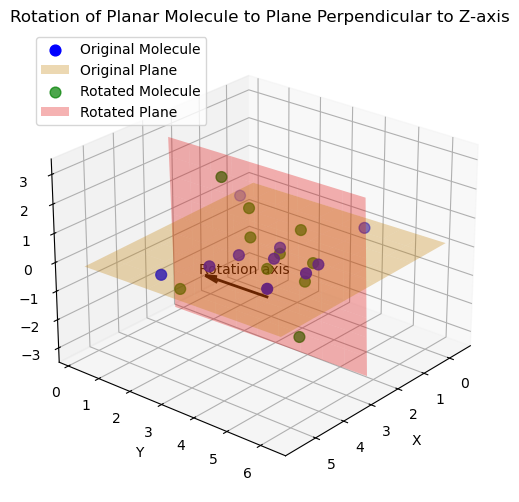

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Setup same molecule coords (you can reuse your coords)
np.random.seed(0)
N = 10
xy_coords = np.random.rand(N, 2) * 5
z_coords = np.random.randn(N) * 0.05
coords = np.hstack([xy_coords, z_coords[:, None]])
coords_centered = coords - coords.mean(axis=0)
point = coords.mean(axis=0)

# Plane fitting via SVD
U, S, Vt = np.linalg.svd(coords_centered)
normal_vector = Vt[2]

# Plane grid (original plane)
plane_size = 6
xx, yy = np.meshgrid(np.linspace(point[0]-plane_size/2, point[0]+plane_size/2, 10),
                     np.linspace(point[1]-plane_size/2, point[1]+plane_size/2, 10))
zz = (-normal_vector[0]*(xx - point[0]) - normal_vector[1]*(yy - point[1])) / normal_vector[2] + point[2]

# Rotation matrix to rotate normal_vector to x-axis (perpendicular to z-axis)
def rotation_matrix_from_vectors(vec1, vec2):
    a, b = (vec1/np.linalg.norm(vec1)).reshape(3), (vec2/np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a,b)
    c = np.dot(a,b)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)
    kmat = np.array([[0,-v[2],v[1]], [v[2],0,-v[0]], [-v[1],v[0],0]])
    return np.eye(3) + kmat + kmat@kmat*((1-c)/(s**2))

# Rotate normal vector to x-axis (perpendicular to z)
target_normal = np.array([1,0,0])
R = rotation_matrix_from_vectors(normal_vector, target_normal)

coords_rot = (R @ (coords - point).T).T + point
plane_points = np.vstack([xx.ravel()-point[0], yy.ravel()-point[1], zz.ravel()-point[2]])
rotated_plane_points = R @ plane_points
xx_rot = rotated_plane_points[0].reshape(xx.shape) + point[0]
yy_rot = rotated_plane_points[1].reshape(yy.shape) + point[1]
zz_rot = rotated_plane_points[2].reshape(zz.shape) + point[2]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Original molecule and plane
ax.scatter(coords[:,0], coords[:,1], coords[:,2], color='blue', s=60, label='Original Molecule')
ax.plot_surface(xx, yy, zz, color='orange', alpha=0.3, label='Original Plane')

# Rotated molecule and plane (semi-transparent)
ax.scatter(coords_rot[:,0], coords_rot[:,1], coords_rot[:,2], color='green', s=60, alpha=0.7, label='Rotated Molecule')
ax.plot_surface(xx_rot, yy_rot, zz_rot, color='red', alpha=0.3, label='Rotated Plane')

# Draw arrow for rotation axis (cross product of vectors)
rotation_axis = np.cross(normal_vector, target_normal)
rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
arrow_start = point + normal_vector * 1.5
ax.quiver(*arrow_start, *rotation_axis, length=2, color='black', linewidth=2, arrow_length_ratio=0.2)
ax.text(*(arrow_start + rotation_axis*2.2), "Rotation axis", color='black', fontsize=10)

# Labels and aesthetics
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Rotation of Planar Molecule to Plane Perpendicular to Z-axis")
ax.legend(loc='upper left')
ax.view_init(elev=25, azim=40)

plt.show()


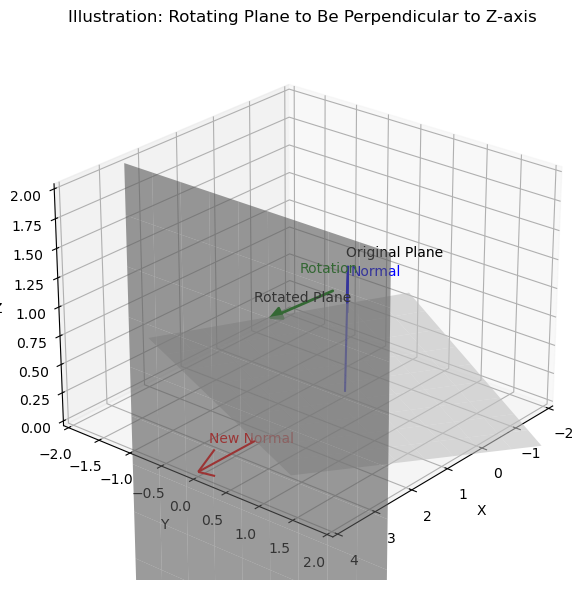

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

# Utility for 3D arrow
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        # project 3D verts to 2D display coords
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()               # <— use the axes projection matrix
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        # required for proper z-ordering
        _, _, zs3d = self._verts3d
        return np.mean(zs3d)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 1) Original tilted plane
plane_size = 2
xx, yy = np.meshgrid(np.linspace(-plane_size, plane_size, 10),
                     np.linspace(-plane_size, plane_size, 10))
zz = 0.5*xx + 0.3*yy
ax.plot_surface(xx, yy, zz, color='lightgray', alpha=0.6, edgecolor='none')
ax.text(0, 0, 1.2, "Original Plane", color='black', fontsize=10)

# 2) Original normal vector
ax.quiver(0, 0, 0, 0.5, 0.3, 1, color='blue', length=1.5, normalize=True)
ax.text(0.6, 0.4, 1.2, "Normal", color='blue')

# 3) Rotated plane (vertical)
yy2, zz2 = np.meshgrid(np.linspace(-plane_size, plane_size, 10),
                       np.linspace(-plane_size, plane_size, 10))
xx2 = np.zeros_like(yy2) + 2.5
ax.plot_surface(xx2, yy2, zz2, color='lightgray', alpha=0.6, edgecolor='none')
ax.text(2.5, 0, 1.2, "Rotated Plane", color='black', fontsize=10)

# 4) New normal (aligned with x-axis)
ax.quiver(2.5, 0, 0, 1, 0, 0, color='red', length=1.5, normalize=True)
ax.text(3.7, 0, 0.2, "New Normal", color='red')

# 5) Conceptual rotation arrow
arrow = Arrow3D([1.2, 2.2], [0.5, 0], [1.2, 1.0],
                mutation_scale=20, lw=2, arrowstyle="-|>", color="green")
ax.add_artist(arrow)
ax.text(1.8, 0.3, 1.4, "Rotation", color='green')

# Axes labels & view
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Illustration: Rotating Plane to Be Perpendicular to Z-axis")
ax.view_init(elev=25, azim=40)
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 2)

plt.tight_layout()
plt.show()
